# Imtiaz Electronics Department Analysis
### In this project, we'll examines customer behavior to form effective strategies for enhancing sales and engagement.
## Importing Necessary Libraries 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

# 1. Data Acquisition:
### Loading Data from JSON File and analyzing garbage values in data

In [3]:
file=pd.read_json(r"Data\electronics.json")
file.head()  # previewing the loaded data 

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,01,2010,Winter
1,,25,Male,High,,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318,77,2,1,Low,08,1989,Fall
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,,1995,Winter
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,09,2012,Fall
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,01,2010,Summer


# 2. Data Cleaning:
### Analzing Null and Hidden Values in Dataset

In [4]:
file.replace("", np.nan, inplace=True)  # replacing empty values with np.nan
null_info = file.isna().sum()
null_summary = pd.DataFrame({'NA Values': null_info})

hidden_info = (file == "Hidden").sum()
hidden_summary = pd.DataFrame({"Hidden Values ": hidden_info})

data_summary = pd.concat([null_summary, hidden_summary], axis = 1)
data_summary

,NA Values,Hidden Values
Customer_ID,32,12
Age,33,7
Gender,33,15
Income_Level,41,9
Address,32,15
Transaction_ID,39,11
Purchase_Date,35,13
Product_ID,40,9
Product_Category,44,16
Brand,46,12


### Standardizing data format of columns, and checking skewness of data

In [11]:
file["Age"] = pd.to_numeric(file["Age"], errors = "coerce")
file["Purchase_Date"] = pd.to_datetime(file["Purchase_Date"], errors = "coerce")

file.replace("Hidden", pd.NA, inplace= True) # replaing hidden values with np.nan

age_skew = file["Age"].skew()
print("Age Skewness: ", age_skew)

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\missing.py:95: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  new_mask = arr == x


AttributeError: 'bool' object has no attribute 'to_numpy'

### Applying imputation techniques to deal with missing values (if highly skewed i.e (1 < skew < -1) use median, else use mean)

In [8]:

# using mean median and mode to fill missing values
file["Age"]=file["Age"].fillna(file["Age"].mean())
file["Gender"] = file["Gender"].fillna(file["Gender"].mode()[0])


# Impute missing values with the mode
file['Income_Level']=file['Income_Level'].fillna(file['Income_Level'].mode()[0])

file['Address']=file['Address'].fillna('Unknown')

file['Product_Category']=file['Product_Category'].fillna(file['Product_Category'].mode()[0])

file['Brand']=file['Brand'].fillna(file['Brand'].mode()[0])

month_med=file['Month'].median()
file['Month']=file['Month'].fillna(month_med)
file['Year']=file['Year'].fillna(file['Year'].median())
file['Season'] = file['Season'].fillna(file['Season'].mode()[0])
file['Purchase_Frequency_Per_Month']= file['Purchase_Frequency_Per_Month'].fillna(file['Purchase_Frequency_Per_Month'].median())
file["Purchase_Amount"]=file["Purchase_Amount"].fillna(file["Purchase_Amount"].median())
file["Brand_Affinity_Score"]=file["Brand_Affinity_Score"].fillna(file["Brand_Affinity_Score"].median())
file["Average_Spending_Per_Purchase"]=file["Average_Spending_Per_Purchase"].fillna(file["Average_Spending_Per_Purchase"].median())
file["Product_Category_Preferences"]=file["Product_Category_Preferences"].fillna(file["Product_Category_Preferences"].mode()[0])
file['Customer_ID']=file['Customer_ID'].fillna('unknown')
file['Purchase_Amount'] = file['Purchase_Amount'].replace('Hidden', np.nan)
file['Purchase_Date']=file['Purchase_Date'].fillna(method='ffill')
file['Transaction_ID']=file['Transaction_ID'].fillna('unknown')
file['Product_ID']=file['Product_ID'].fillna('unknown')

In [8]:
file.isna().sum()

Customer_ID                      0
Age                              0
Gender                           0
Income_Level                     0
Address                          0
Transaction_ID                   0
Purchase_Date                    0
Product_ID                       0
Product_Category                 0
Brand                            0
Purchase_Amount                  0
Average_Spending_Per_Purchase    0
Purchase_Frequency_Per_Month     0
Brand_Affinity_Score             0
Product_Category_Preferences     0
Month                            0
Year                             0
Season                           0
dtype: int64

In [7]:
file['Season'] = file['Season'].astype('object')

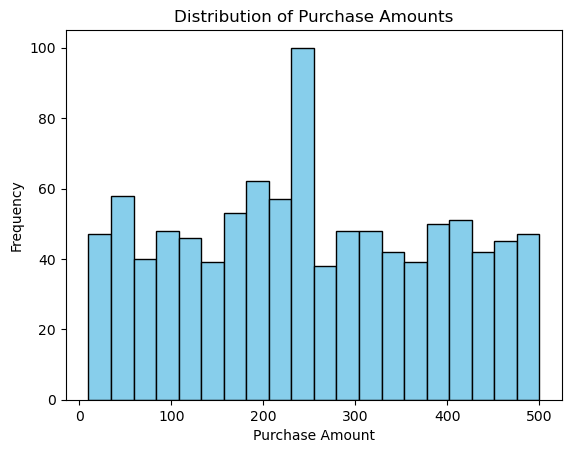

In [8]:

file['Purchase_Amount'] = pd.to_numeric(file['Purchase_Amount'], errors='coerce')

# Assuming 'file' is your DataFrame with the 'Purchase_Amount' column
plt.hist(file['Purchase_Amount'], bins=20, edgecolor='black', color='skyblue')

# Set plot labels and title
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')

# Display the plot
plt.show()

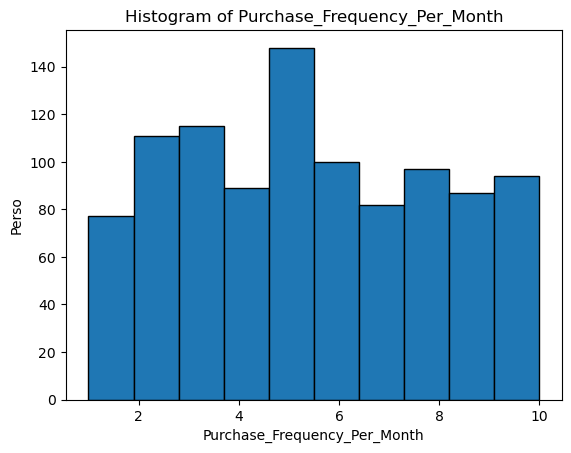

In [9]:
file['Purchase_Frequency_Per_Month'] = pd.to_numeric(file['Purchase_Frequency_Per_Month'], errors='coerce')
plt.hist(file['Purchase_Frequency_Per_Month'], bins=10, edgecolor='black')  # Dropna to exclude missing values
plt.title('Histogram of Purchase_Frequency_Per_Month')
plt.xlabel('Purchase_Frequency_Per_Month')
plt.ylabel('Perso')
plt.show()

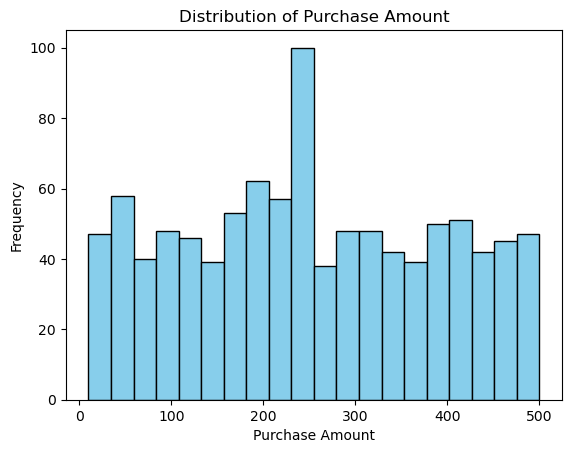

In [10]:
plt.hist(file['Purchase_Amount'], bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

In [11]:
file.isna().sum()

Unnamed: 0.1                      0
Unnamed: 0                        0
Customer_ID                      44
Age                               0
Gender                            0
Income_Level                      0
Address                           0
Transaction_ID                   50
Purchase_Date                    48
Product_ID                       49
Product_Category                  0
Brand                             0
Purchase_Amount                   0
Average_Spending_Per_Purchase     0
Purchase_Frequency_Per_Month      0
Brand_Affinity_Score              0
Product_Category_Preferences      0
Month                             0
Year                              0
Season                            0
dtype: int64

Text(0.5, 1.0, 'HISTOGRAM OF Brand_Affinity_Score')

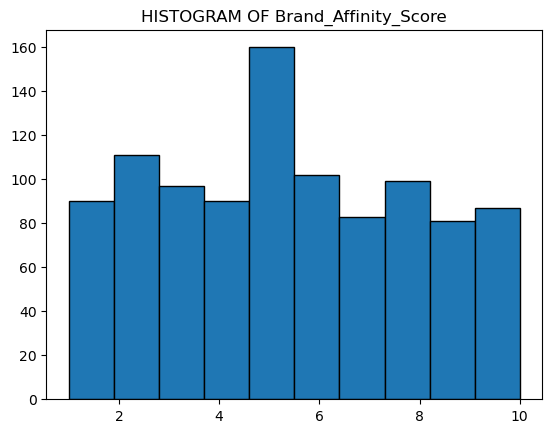

In [12]:
file["Brand_Affinity_Score"]=pd.to_numeric(file["Brand_Affinity_Score"],errors='coerce')
plt.hist(file["Brand_Affinity_Score"],bins=10,edgecolor="black")
plt.title("HISTOGRAM OF Brand_Affinity_Score")

Text(0.5, 1.0, 'Average_Spending_Per_Purchase')

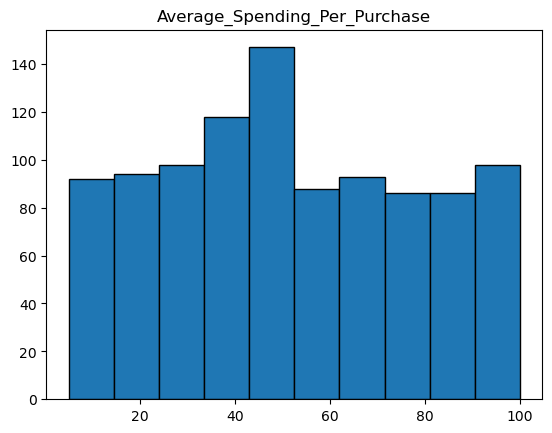

In [13]:
file["Average_Spending_Per_Purchase"]=pd.to_numeric(file["Average_Spending_Per_Purchase"],errors="coerce")
plt.hist(file["Average_Spending_Per_Purchase"],bins=10 ,edgecolor="black" )
plt.title("Average_Spending_Per_Purchase")

In [14]:
file.isna().sum()

Unnamed: 0.1                      0
Unnamed: 0                        0
Customer_ID                      44
Age                               0
Gender                            0
Income_Level                      0
Address                           0
Transaction_ID                   50
Purchase_Date                    48
Product_ID                       49
Product_Category                  0
Brand                             0
Purchase_Amount                   0
Average_Spending_Per_Purchase     0
Purchase_Frequency_Per_Month      0
Brand_Affinity_Score              0
Product_Category_Preferences      0
Month                             0
Year                              0
Season                            0
dtype: int64

<Axes: >

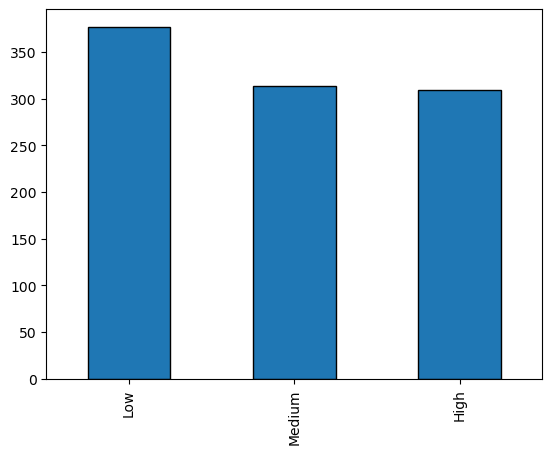

In [15]:
Product_Category_ = file["Product_Category_Preferences"].value_counts()
Product_Category_.plot(kind="bar",edgecolor="black")

In [16]:
file['Purchase_Date'] = pd.to_datetime(file['Purchase_Date'], errors='coerce')

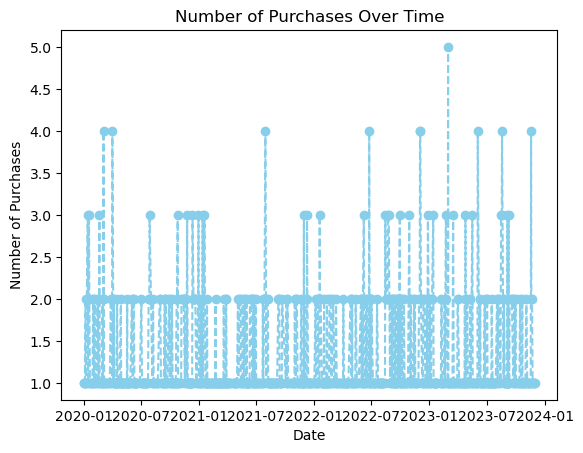

In [17]:
purchase_counts = file.groupby(file['Purchase_Date'].dt.date).size()

# Plot a line chart
plt.plot(purchase_counts.index, purchase_counts.values, marker='o', linestyle='--', color='skyblue')

# Set plot labels and title
plt.title('Number of Purchases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Purchases')

# Display the plot
plt.show()

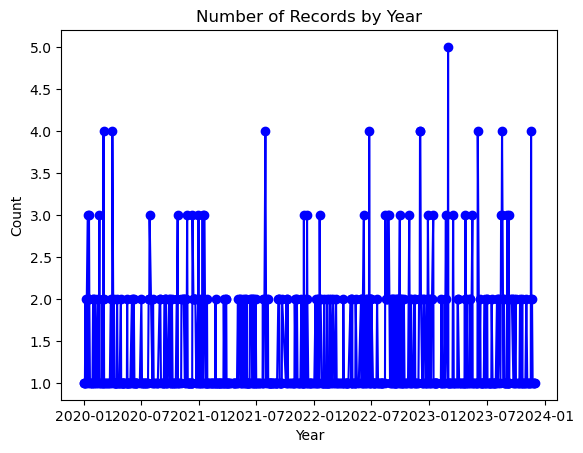

In [18]:

year_counts = file['Purchase_Date'].value_counts().sort_index()

# Plot a bar chart or line plot
plt.plot(year_counts.index, year_counts.values, marker='o', linestyle='-', color='b')

# Set plot labels and title
plt.title('Number of Records by Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Display the plot
plt.show()

In [19]:
import numpy as np 


In [20]:
file.isna().sum()

Unnamed: 0.1                      0
Unnamed: 0                        0
Customer_ID                      44
Age                               0
Gender                            0
Income_Level                      0
Address                           0
Transaction_ID                   50
Purchase_Date                    48
Product_ID                       49
Product_Category                  0
Brand                             0
Purchase_Amount                   0
Average_Spending_Per_Purchase     0
Purchase_Frequency_Per_Month      0
Brand_Affinity_Score              0
Product_Category_Preferences      0
Month                             0
Year                              0
Season                            0
dtype: int64

In [21]:
file['Gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [22]:
file

,Unnamed: 0.1,Unnamed: 0,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,0,0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193.0,59.0,2.0,2.0,Low,01,2010,Winter
1,1,1,NaN,25,Male,High,Unknown,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318.0,77.0,2.0,1.0,Low,08,1989,Fall
2,2,2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197.0,100.0,9.0,1.0,Low,6.0,1995,Winter
3,3,3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262.0,97.0,3.0,4.0,Low,09,2012,Fall
4,4,4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429.0,85.0,7.0,2.0,High,01,2010,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,995,NaN,70,Male,Medium,"566 Butler Turnpike\nPort Holly, OK 22329",776be313-5308-468e-a0ed-7409a4303364,2023-03-17,1802f115-80d8-48fd-ad97-94038fe31b82,Electronics,Brand_C,180.0,92.0,2.0,5.0,Medium,05,1987,Fall
996,996,996,2116266d-8d1c-48cc-ac28-e4e675cb2a4d,78,Female,Low,"45710 Wilson Circles Apt. 411\nWalterton, NC 8...",51f771bf-2562-46c1-a25d-2f46f4bb1525,2023-08-30,546d8d8f-1498-4aa9-8123-29550d911a17,Books,Brand_B,176.0,53.0,3.0,3.0,Medium,09,1977,Winter
997,997,997,562cee08-f909-4e1c-a811-5711f967bea5,63,Male,High,"243 Emily Creek\nSouth Lindaport, CO 81594",74eba598-ee91-4396-a137-6b869702ef29,NaT,8b6ffec8-de54-445c-90d0-1399858b2e16,Electronics,Brand_C,212.0,99.0,2.0,9.0,Low,12,1995,Summer
998,998,998,84da2eea-6e9e-46d4-8d94-1e9b0c377d78,43,Male,High,"1129 Kirby Ferry Suite 743\nBillyfurt, UT 41587",4d2e213e-bcc0-4a8a-9501-6ca8361381c4,2021-05-13,51ed2d86-c9ab-4922-a8ff-469acf6ac91e,Clothing,Brand_C,246.0,98.0,8.0,7.0,Low,03,2000,Fall


In [23]:
from scipy import stats

# Assuming 'file' is your DataFrame
purchase_amount_z_scores = stats.zscore(file['Purchase_Amount'])
outliers = (np.abs(purchase_amount_z_scores) > 3)

# Identify and print rows with potential outliers
outlier_columns = file[outliers]
print("Rows with potential outliers:")
print(outlier_columns)

# Decide whether to retain or remove outliers based on your analysis goals


Rows with potential outliers:
Empty DataFrame
Columns: [Unnamed: 0.1, Unnamed: 0, Customer_ID, Age, Gender, Income_Level, Address, Transaction_ID, Purchase_Date, Product_ID, Product_Category, Brand, Purchase_Amount, Average_Spending_Per_Purchase, Purchase_Frequency_Per_Month, Brand_Affinity_Score, Product_Category_Preferences, Month, Year, Season]
Index: []


## Analyze outliers and determine whether to retain or remove them based on
##  their impact on the analysis.

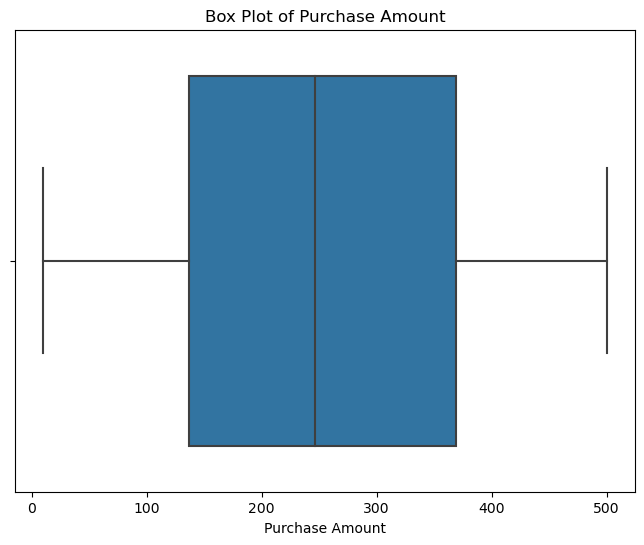

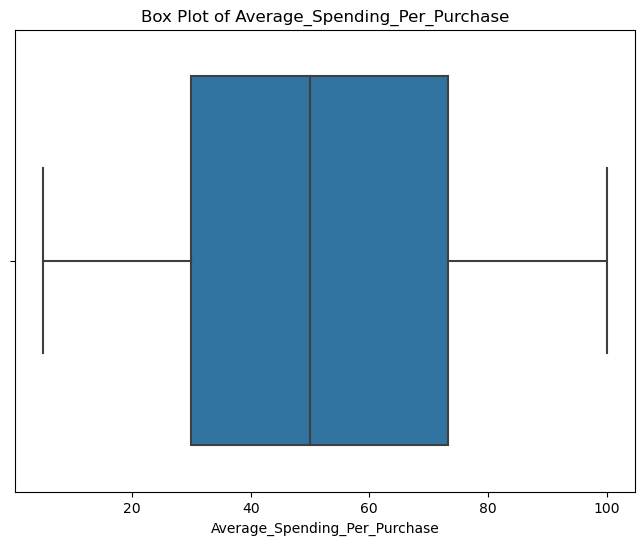

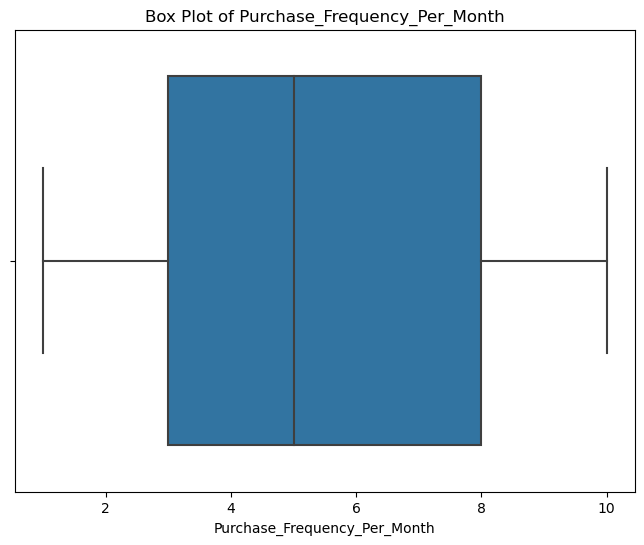

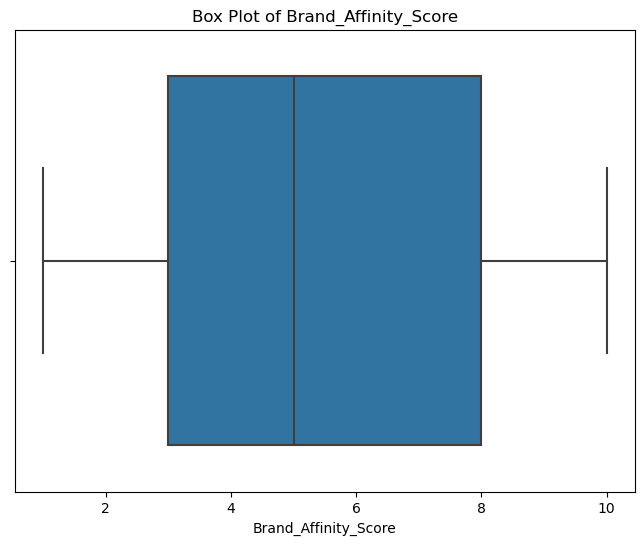

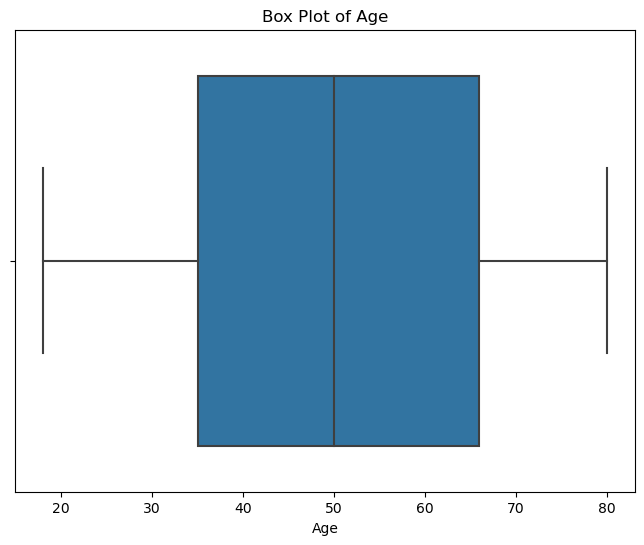

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'file' is your DataFrame
plt.figure(figsize=(8, 6))
file['Purchase_Amount'] = pd.to_numeric(file['Purchase_Amount'], errors='coerce')
sns.boxplot(x=file['Purchase_Amount'])
plt.title('Box Plot of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.show()


plt.figure(figsize=(8, 6))
file['Average_Spending_Per_Purchase'] = pd.to_numeric(file['Average_Spending_Per_Purchase'], errors='coerce')
sns.boxplot(x=file['Average_Spending_Per_Purchase'])
plt.title('Box Plot of Average_Spending_Per_Purchase')
plt.xlabel('Average_Spending_Per_Purchase')
plt.show()

plt.figure(figsize=(8, 6))
file['Purchase_Frequency_Per_Month'] = pd.to_numeric(file['Purchase_Frequency_Per_Month'], errors='coerce')
sns.boxplot(x=file['Purchase_Frequency_Per_Month'])
plt.title('Box Plot of Purchase_Frequency_Per_Month')
plt.xlabel('Purchase_Frequency_Per_Month')
plt.show()

plt.figure(figsize=(8, 6))
file['Brand_Affinity_Score'] = pd.to_numeric(file['Brand_Affinity_Score'], errors='coerce')
sns.boxplot(x=file['Brand_Affinity_Score'])
plt.title('Box Plot of Brand_Affinity_Score')
plt.xlabel('Brand_Affinity_Score')
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
file['Age'] = pd.to_numeric(file['Age'], errors='coerce')
# Assuming 'file' is your DataFrame
plt.figure(figsize=(8, 6))
sns.boxplot(x=file['Age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

#  Address inconsistencies in data format and encoding. 

In [18]:
file['Purchase_Amount'] = pd.to_numeric(file['Purchase_Amount'], errors='coerce')
file['Season'] = file['Season'].astype('object')
file['Purchase_Amount'] = pd.to_numeric(file['Purchase_Amount'], errors='coerce')
file['Average_Spending_Per_Purchase'] = pd.to_numeric(file['Average_Spending_Per_Purchase'], errors='coerce')
file['Purchase_Frequency_Per_Month'] = pd.to_numeric(file['Purchase_Frequency_Per_Month'], errors='coerce')
file['Brand_Affinity_Score'] = pd.to_numeric(file['Brand_Affinity_Score'], errors='coerce')
file['Age'] = pd.to_numeric(file['Age'], errors='coerce')



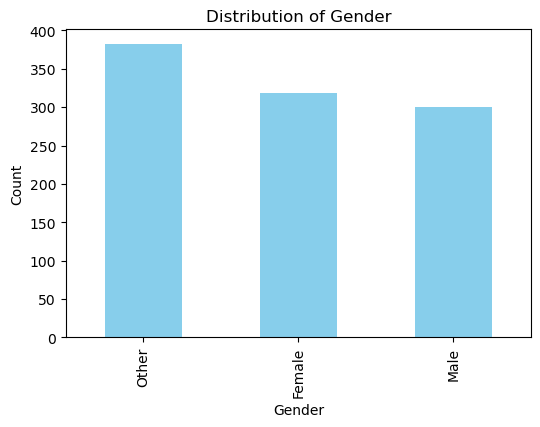

In [13]:

plt.figure(figsize=(6, 4))
file['Gender'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [39]:
# Assuming 'file' is your DataFrame
file['Purchase_Date'] = pd.to_datetime(file['Purchase_Date'])
file.sort_values(['Customer_ID', 'Purchase_Date'], inplace=True)
file['Time_Since_Last_Purchase'] = file.groupby('Customer_ID')['Purchase_Date'].diff().dt.days
file['Time_Since_Last_Purchase'].fillna(0, inplace=True)  # Fill NaN values with 0 for the first purchase


In [40]:
# Assuming 'file' is your DataFrame
bins = [0, 18, 25, 35, 50, 100]  # Define age bins
labels = ['0-18', '19-25', '26-35', '36-50', '50+']  # Labels for age groups
file['Age_Group'] = pd.cut(file['Age'], bins=bins, labels=labels, right=False)


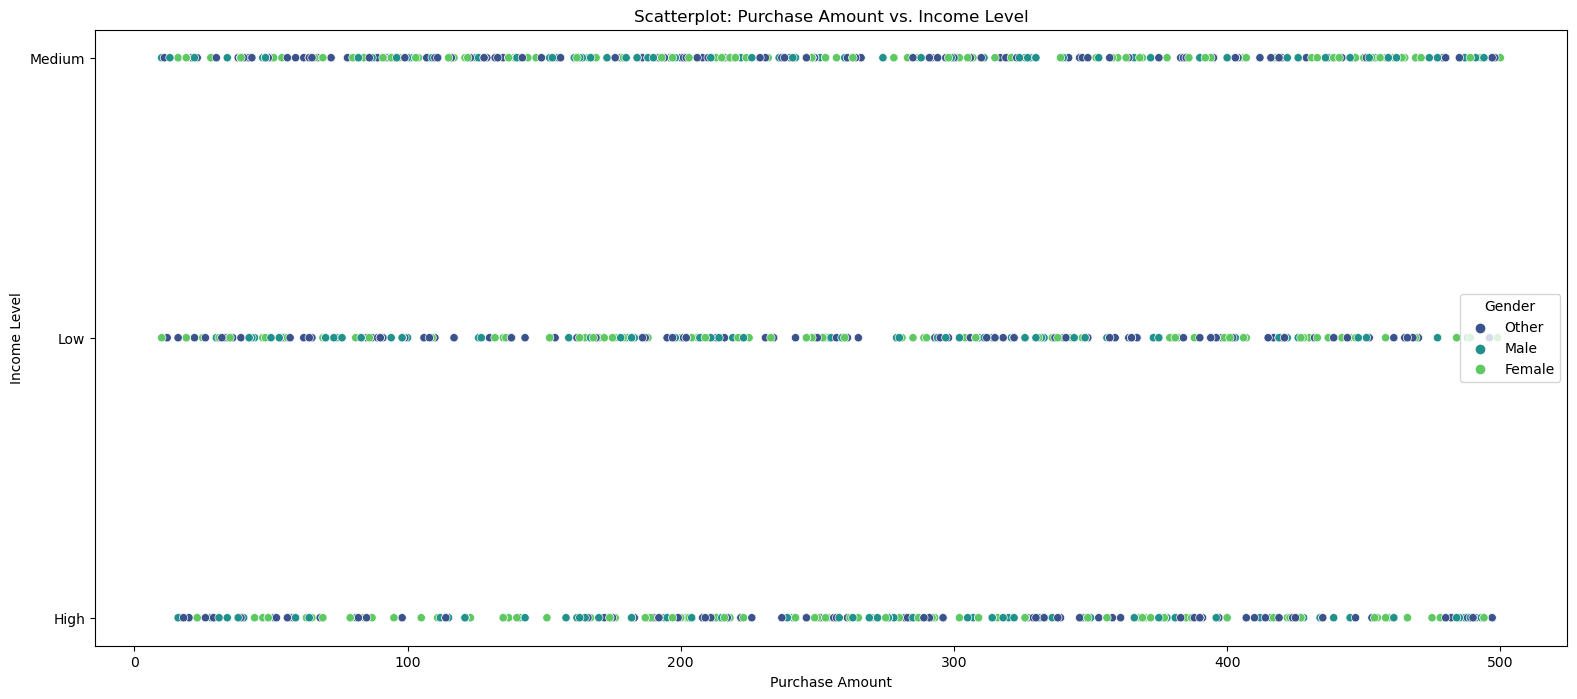

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming 'file' is your DataFrame
plt.figure(figsize=(19, 8))
sns.scatterplot(x='Purchase_Amount', y='Income_Level', data=file, hue='Gender', palette='viridis')
plt.title('Scatterplot: Purchase Amount vs. Income Level')
plt.ylabel('Income Level')
plt.xlabel('Purchase Amount')
plt.legend(title='Gender')
plt.show()


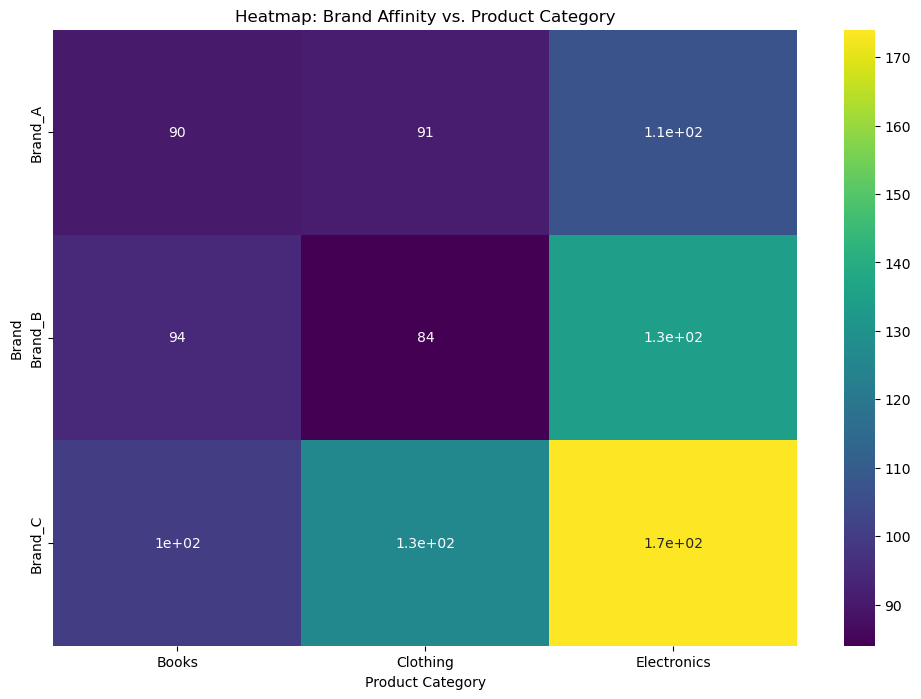

In [48]:
# Assuming 'file' is your DataFrame
brand_category_heatmap_data = file.groupby(['Brand', 'Product_Category']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(brand_category_heatmap_data, cmap='viridis', annot=True)
plt.title('Heatmap: Brand Affinity vs. Product Category')
plt.xlabel('Product Category')
plt.ylabel('Brand')
plt.show()

In [ ]:
# Assuming 'file' is your DataFrame
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='Purchase_Frequency_Per_Month', data=file, hue='Gender', palette='viridis')
plt.title('Scatterplot: Purchase Frequency vs. Age')
plt.xlabel('Age')
plt.ylabel('Purchase Frequency per Month')
plt.legend(title='Gender')
plt.show()

In [ ]:
# Assuming 'file' is your DataFrame
correlation_matrix = file.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Assuming 'file' is your DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Purchase_Date' to datetime
file['Purchase_Date'] = pd.to_datetime(file['Purchase_Date'])

# Group by month and calculate purchase frequency
monthly_purchase_frequency = file.resample('M', on='Purchase_Date')['Transaction_ID'].count()

# Plotting trends in purchase frequency
plt.figure(figsize=(12, 6))
monthly_purchase_frequency.plot(marker='o', linestyle='-', color='blue')
plt.title('Monthly Trends in Purchase Frequency')
plt.xlabel('Month')
plt.ylabel('Purchase Frequency')
plt.show()


In [ ]:
# Assuming 'file' is your DataFrame
# Group by month and calculate average spending
monthly_average_spending = file.resample('M', on='Purchase_Date')['Purchase_Amount'].mean()

# Plotting trends in average spending
plt.figure(figsize=(12, 6))
monthly_average_spending.plot(marker='o', linestyle='-', color='green')
plt.title('Monthly Trends in Average Spending')
plt.xlabel('Month')
plt.ylabel('Average Spending')
plt.show()


In [ ]:
# Assuming 'file' is your DataFrame
# Group by month and calculate product category preferences
monthly_category_preferences = file.groupby(['Month', 'Product_Category']).size().unstack(fill_value=0)

# Plotting trends in product category preferences
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_category_preferences, cmap='viridis', annot=True, fmt='g', linewidths=.5)
plt.title('Monthly Trends in Product Category Preferences')
plt.xlabel('Product Category')
plt.ylabel('Month')
plt.show()


In [ ]:
#categories
file.isna().sum()
file.info()

In [57]:
# Assuming 'file' is your DataFrame
file.info()
help(pd.cut)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 871 to 926
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Unnamed: 0.1                   1000 non-null   int64         
 1   Unnamed: 0                     1000 non-null   int64         
 2   Customer_ID                    956 non-null    object        
 3   Age                            1000 non-null   float64       
 4   Gender                         1000 non-null   object        
 5   Income_Level                   1000 non-null   object        
 6   Address                        1000 non-null   object        
 7   Transaction_ID                 950 non-null    object        
 8   Purchase_Date                  1000 non-null   datetime64[ns]
 9   Product_ID                     951 non-null    object        
 10  Product_Category               1000 non-null   object        
 11  Brand           

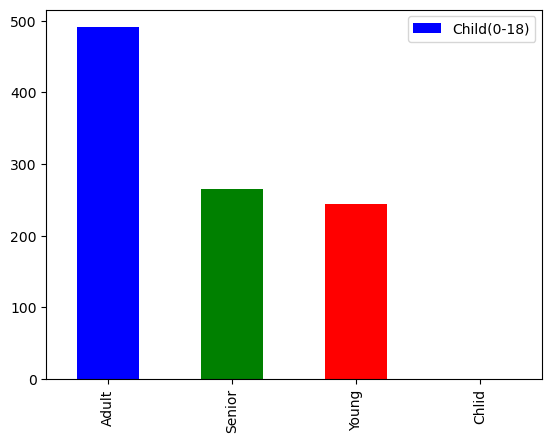

In [61]:
# Assuming 'file' is your DataFrame
bins = [0, 18, 35, 65, 100]
labels = ['Chlid','Young', 'Adult', 'Senior']

file['age_category'] = pd.cut(file['Age'], bins=bins, labels=labels, right=False)


# Plot the bar chart with specified colors
file['age_category'].value_counts().plot(kind='bar', color=colors)
plt.legend(['Child(0-18)', 'Young(18-35)', 'Adult(35-65)', 'Senior(65-100)'])

plt.show() #need to beautify

In [49]:
loyalty_conditions = [
    (file['Purchase_Frequency_Per_Month'] >= 8) & (file['Brand_Affinity_Score'] >= 8),
    (file['Purchase_Frequency_Per_Month'] >= 5) & (file['Brand_Affinity_Score'] >= 5),
    (file['Purchase_Frequency_Per_Month'] < 5) | (file['Brand_Affinity_Score'] < 5)
]

loyalty_levels = ['High', 'Medium', 'Low']

file['Customer_Loyalty_Level'] = np.select(loyalty_conditions, loyalty_levels)

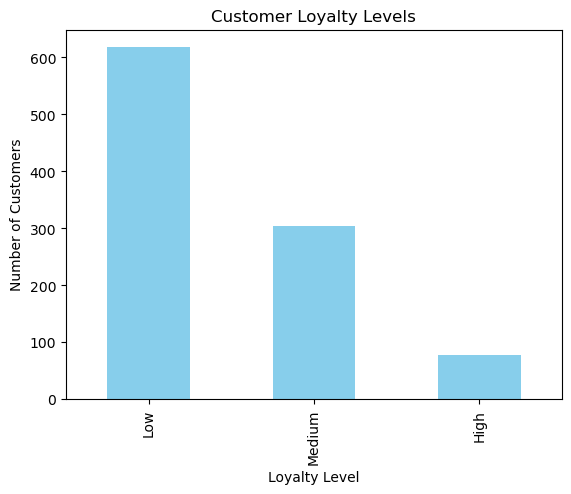

In [27]:
loyalty_counts = file['Customer_Loyalty_Level'].value_counts()

# Plotting the bar chart
loyalty_counts.plot(kind='bar', color='skyblue')
plt.title('Customer Loyalty Levels')
plt.xlabel('Loyalty Level')
plt.ylabel('Number of Customers')
plt.show()

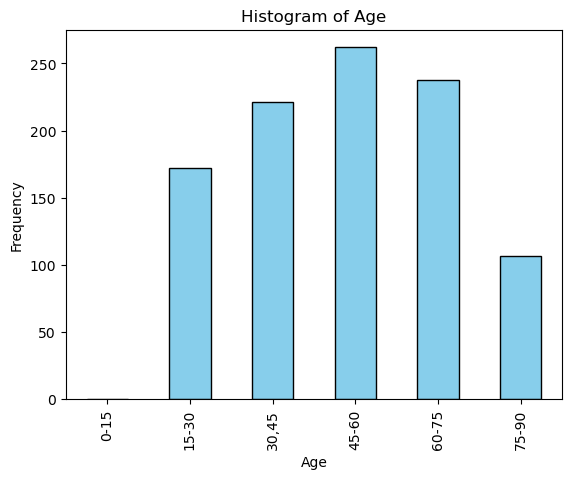

In [52]:
#Univariate Analysis
#age analysis
file['Age'] = pd.to_numeric(file['Age'], errors='coerce')
age_labels=['0-15','15-30','30,45','45-60','60-75','75-90']
age_bins = [0, 15, 30, 45, 60, 75, float('inf')]
file['age_group'] = pd.cut(file['Age'], bins=age_bins, labels=age_labels, right=False)
file['age_group'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency') 
plt.show()

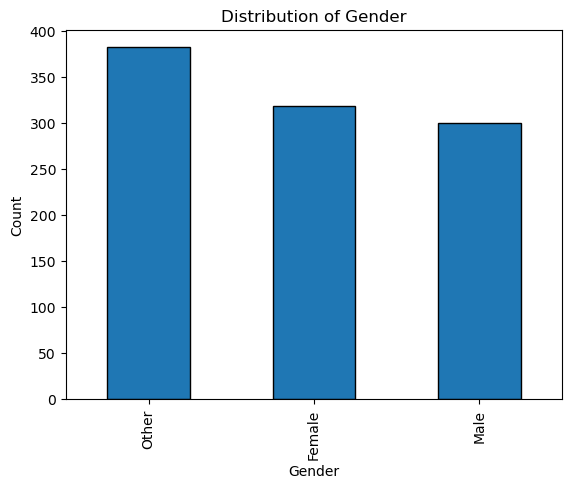

In [29]:
#gender
gender_counts = file['Gender'].value_counts()

# Plot a bar graph
gender_counts.plot(kind='bar', edgecolor='black')

# Set plot labels and title
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Display the plot
plt.show()

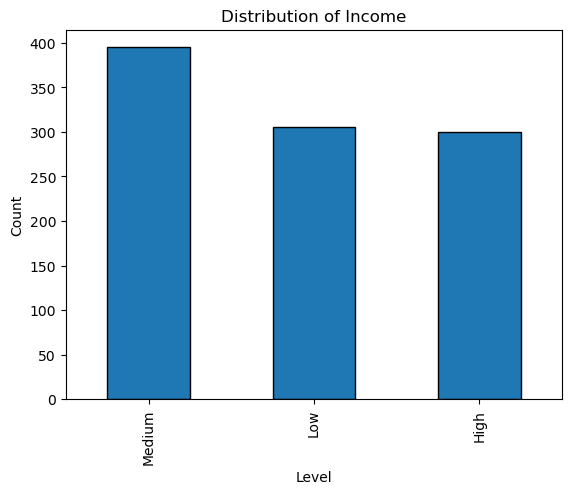

In [30]:
#income evel
gender_counts = file['Income_Level'].value_counts()

# Plot a bar graph
gender_counts.plot(kind='bar', edgecolor='black')

# Set plot labels and title
plt.title('Distribution of Income')
plt.xlabel('Level')
plt.ylabel('Count')

# Display the plot
plt.show()

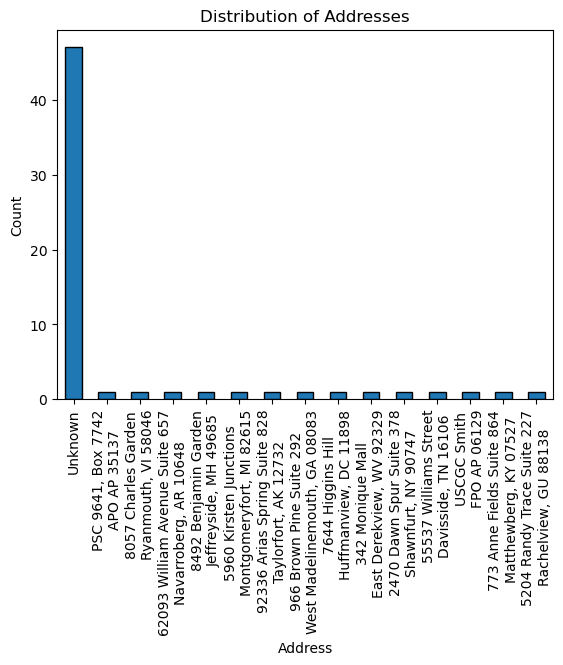

In [31]:
#Address
address_counts = file['Address'].value_counts().head(15)
address_counts.plot(kind='bar', edgecolor='black')

# Set plot labels and title
plt.title('Distribution of Addresses')
plt.xlabel('Address')
plt.ylabel('Count')

# Display the plot
plt.show()

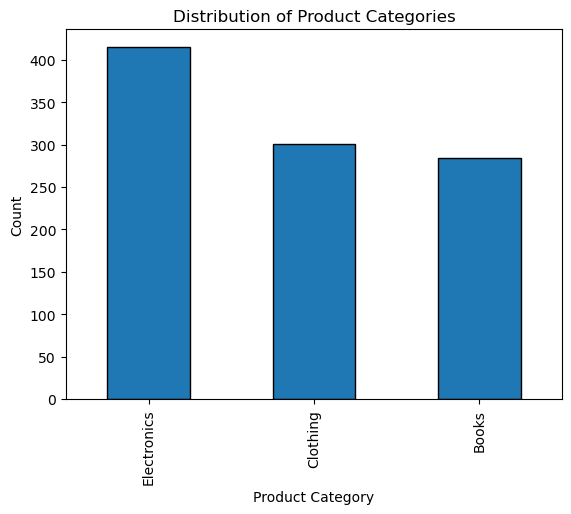

In [32]:
#Product Category
product_category_counts = file['Product_Category'].value_counts()
product_category_counts.plot(kind='bar', edgecolor='black')

# Set plot labels and title
plt.title('Distribution of Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')

# Display the plot
plt.show()

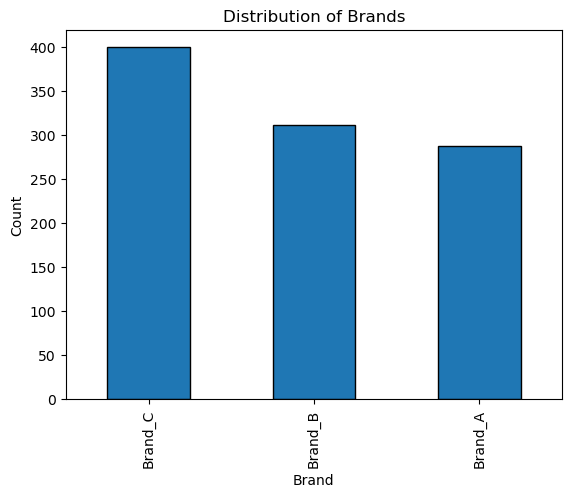

In [33]:
#Braaand Distribution
brand_counts = file['Brand'].value_counts()
# Plot a bar chart
brand_counts.plot(kind='bar', edgecolor='black')

# Set plot labels and title
plt.title('Distribution of Brands')
plt.xlabel('Brand')
plt.ylabel('Count')

# Display the plot
plt.show()

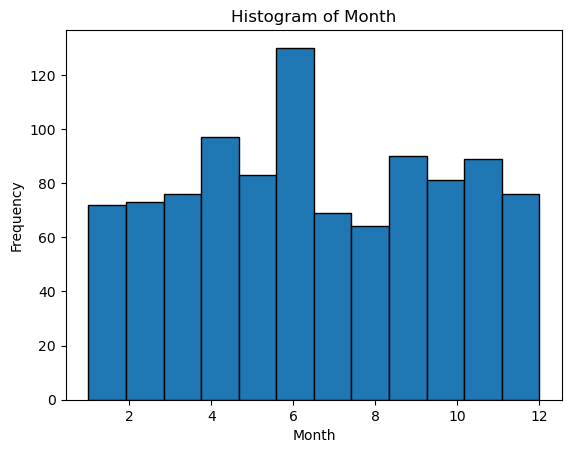

In [34]:
#Month
file['Month'] = pd.to_numeric(file['Month'], errors='coerce')
plt.hist(file['Month'], bins=12,edgecolor='black')  # Dropna to exclude missing values
plt.title('Histogram of Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

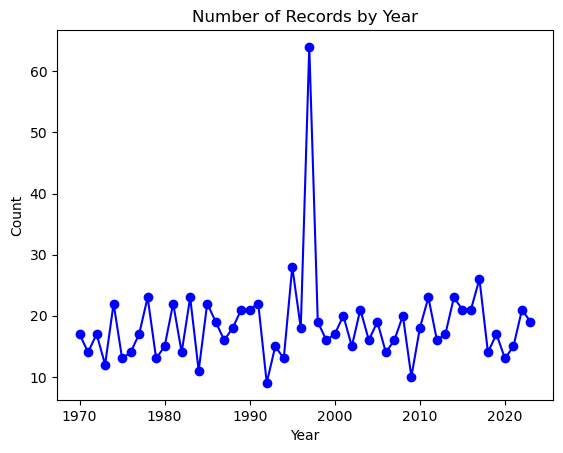

In [35]:
#year
file['Year'] = pd.to_numeric(file['Year'], errors='coerce')
year_counts = file['Year'].value_counts().sort_index()

# Plot a bar chart or line plot
plt.plot(year_counts.index, year_counts.values, marker='o', linestyle='-', color='b')

# Set plot labels and title
plt.title('Number of Records by Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Display the plot
plt.show()

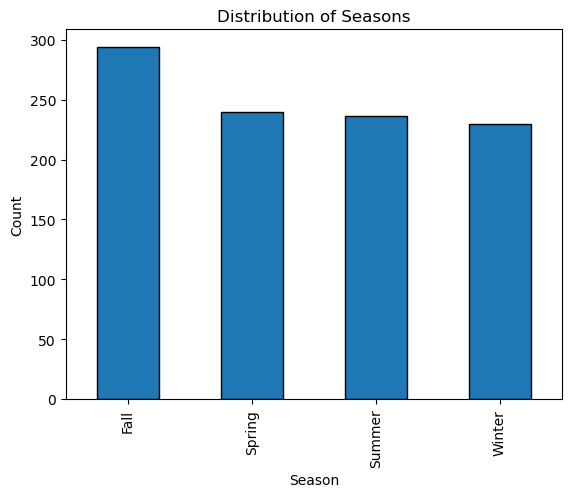

In [36]:
# purchase count with respect to saeson
season_counts = file['Season'].value_counts()

# Plot a bar chart
season_counts.plot(kind='bar', edgecolor='black')

# Set plot labels and title
plt.title('Distribution of Seasons')
plt.xlabel('Season')
plt.ylabel('Count')

# Display the plot
plt.show()

In [37]:
file['Purchase_Date']=file['Purchase_Date'].fillna(file['Purchase_Date'].mode()[0])



In [38]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Unnamed: 0.1                   1000 non-null   int64         
 1   Unnamed: 0                     1000 non-null   int64         
 2   Customer_ID                    956 non-null    object        
 3   Age                            1000 non-null   float64       
 4   Gender                         1000 non-null   object        
 5   Income_Level                   1000 non-null   object        
 6   Address                        1000 non-null   object        
 7   Transaction_ID                 950 non-null    object        
 8   Purchase_Date                  1000 non-null   datetime64[ns]
 9   Product_ID                     951 non-null    object        
 10  Product_Category               1000 non-null   object        
 11  Brand             